#   Bessel Processes Part II

The purpose of these notebooks (Bessel Processes Part I-III) is to provide an illustration of the [Bessel Processes](https://en.wikipedia.org/wiki/Bessel_process) and some of their main properties. 

- In Part I, we  introduce both Bessel and Squared Bessel processes with integer dimension $d\geq 2,$ and study some of its main properties. 
- In Part II, we show that Bessel processes with integer dimension satisfy certain Stochastic Differential Equations (SDEs). This representation allows us to extend them to the non-integer case.  
- Finally, in Part III we illustrate both Bessel and Squared Bessel processes with general dimension $\delta \geq 0$, and some of its main properties.

Before diving into the theory, let's start by loading the following libraries

-  `matplotlib`  
-  [`aleatory`](https://github.com/quantgirluk/aleatory) 
  
  
together with the style sheet [Quant-Pastel Light](https://github.com/quantgirluk/matplotlib-stylesheets). 

These tools will help us to make insightful visualisations of Bessel processes.

In [1]:
import matplotlib.pyplot as plt
mystyle = "https://raw.githubusercontent.com/quantgirluk/matplotlib-stylesheets/main/quant-pastel-light.mplstyle"
plt.style.use(mystyle)
plt.rcParams["figure.figsize"] = (12,6)

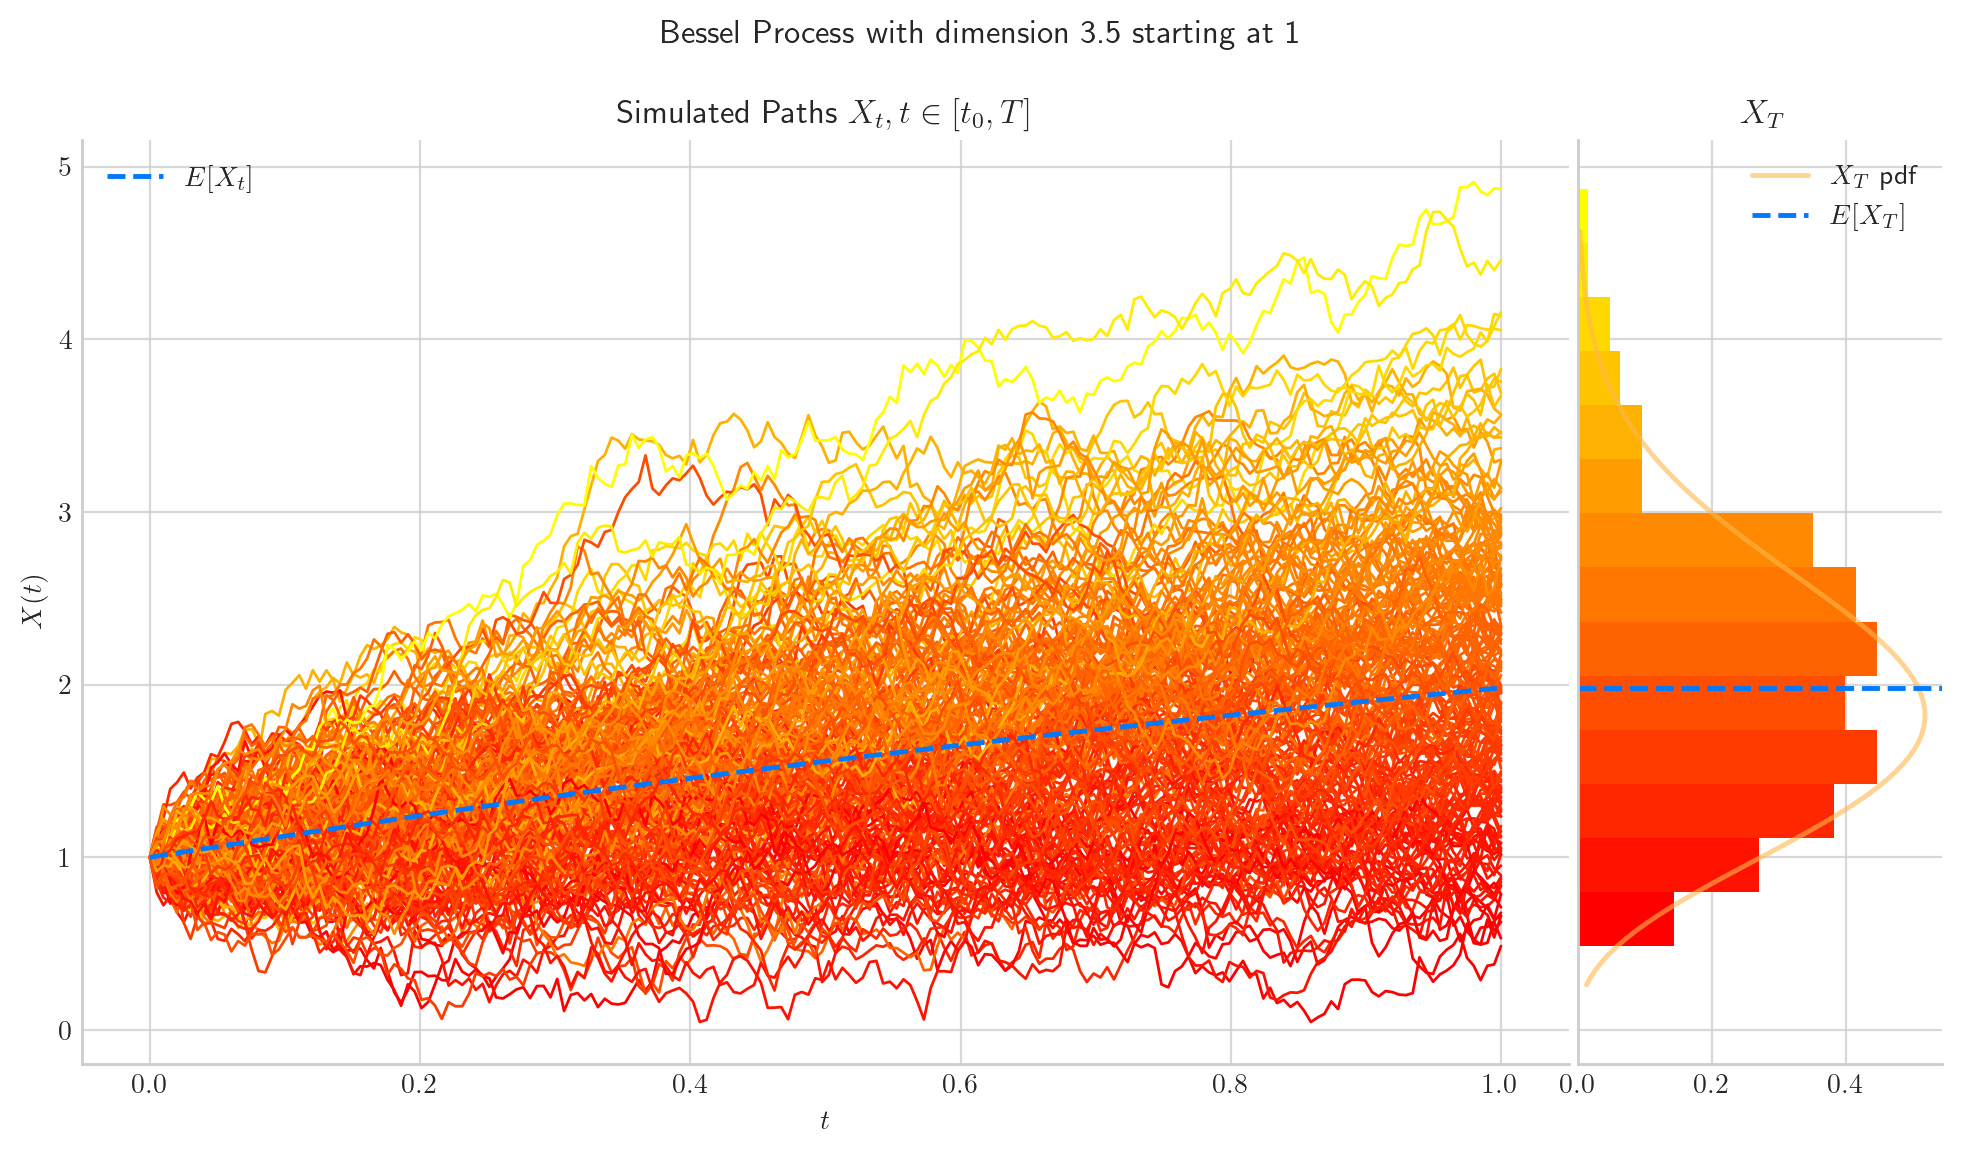

In [2]:
from aleatory.processes import BESProcess
process = BESProcess(initial=1.0, dim=3.5)
fig = process.draw(n=200, N=200, envelope=False, colormap="autumn", title="Bessel Process with dimension 3.5 starting at 1")

### SDE Representation

The next results proves that Bessel processes of integer dimension satisfy a Stochastic Differential Equation (SDE) which can be generalised for non-integer values.


**Proposition 1.** Let $d\geq 2$ be an integer. Then the Bessel process $X$ with integer dimension $d$ starting at zero satisfies the integral equation:

\begin{equation}
X_t = \int_0^t \frac{(d-1)}{2X_s} ds + B_t, \qquad 0\leq t < \infty,
\end{equation}

where $B$ is a standard Brownian motion given by 

\begin{equation*}
B_t = \sum_{i=1}^dB_t^i,
\end{equation*}
with 
\begin{equation*}
B_t^i = \int_0^t \frac{W_s^i}{X_s}dW_s^i,  \qquad 1 \leq i \leq d.
\end{equation*}

*Proof:* A Bessel process with integer dimension $d$ is defined as 

\begin{equation*}
X_t  =  \|W_t\| = \sqrt{\sum_{i=1}^d (W^i_t)^2}, \qquad t \geq 0.
\end{equation*} 


This means that the process  $X_t$ can be at the origen only when $W_t^{1}$ is. Thus,  

$$\mathbb{P}(X_t = 0) = 0, \quad \hbox{for any } t>0.$$ 


This implies that the integrand 

$$\frac{d-1}{2X_s},$$ 

in equation (7.1) is well defined almost surely. 


Next, note that for any $i=1,\cdots, d$, the process $B^i$ is  square integrable since

$$\mathbb{E} \left[ (B^i_t)^2 \right] = \mathbb{E} \left[ \int_0^t  \left(\frac{1}{X_s} W_s^i \right)^2  ds\right] \leq t.$$


So, the process $B$ is square integrable.  Moreover,  we have
\begin{equation*}
\langle B^i, B^j \rangle_t = \int_0^t \frac{1}{X_s^2}W_s^iW_s^j d\langle W^i, W^j \rangle_s= \delta_{ij} \int_0^t \frac{1}{X_s^2}W_s^iW_s^j ds,
\end{equation*}
which implies
\begin{equation*}
\langle B\rangle_t =  \sum_{i=1}^d \langle B^i \rangle_t =  t.
\end{equation*}

By the  Levy's characterisation theorem we can conclude that the process $B$ is indeed a standard Brownian motion.

To prove that $X$ satisfies the SDE (6.4) one could think of applying Ito's formula to the function $f(x) = \| x\|$, for which

\begin{equation*}
\frac{\partial}{\partial x_i} f(x) = \frac{x_i}{\| x \|} , \quad \frac{\partial^2}{\partial x_i \partial x_j} f(x) = \frac{\delta_{ij}}{\| x \|} - \frac{x_i x_j}{\|x \|^3}, \qquad 1 \leq i, j \leq d,
\end{equation*}

holds on $\mathbb{R}^d-\{0\}$. However, this argument cannot be used directly since $f$ is clearly not differentiable at the origin.  Instead, we  will use the corresponding Squared Bessel process 
\begin{equation*}
Y_t  = X_t^2 = \|W_t\|^2 = \sum_{i=1}^d (W^i_t)^2, \qquad t \geq 0.
\end{equation*}


Ito's formula implies that
\begin{equation}
Y_t = 2 \sum_{i=1}^d \int_0^t W_s^i dW_s^i + td.
\end{equation}

Now, the idea is to approximat the function  $g(y)=\sqrt{y}$ smoothly. For $\epsilon>0$, let us define the function $g_{\epsilon}:\mathbb{R} \rightarrow \mathbb{R}$, given by

\begin{equation*}
g_{\epsilon}(y)= \begin{cases}
\frac{3}{8} \sqrt{\epsilon} + \frac{3}{4\sqrt{\epsilon}}y - \frac{1}{8\epsilon \sqrt{\epsilon}}y^2; & y < \epsilon,\\
\sqrt{y}; & y\geq \epsilon,
\end{cases}
\end{equation*}

which is twice differentiable and converges towards $\sqrt{y}$ as $\epsilon \downarrow 0$, for each $y\geq 0$. The next plot shows this approximation.

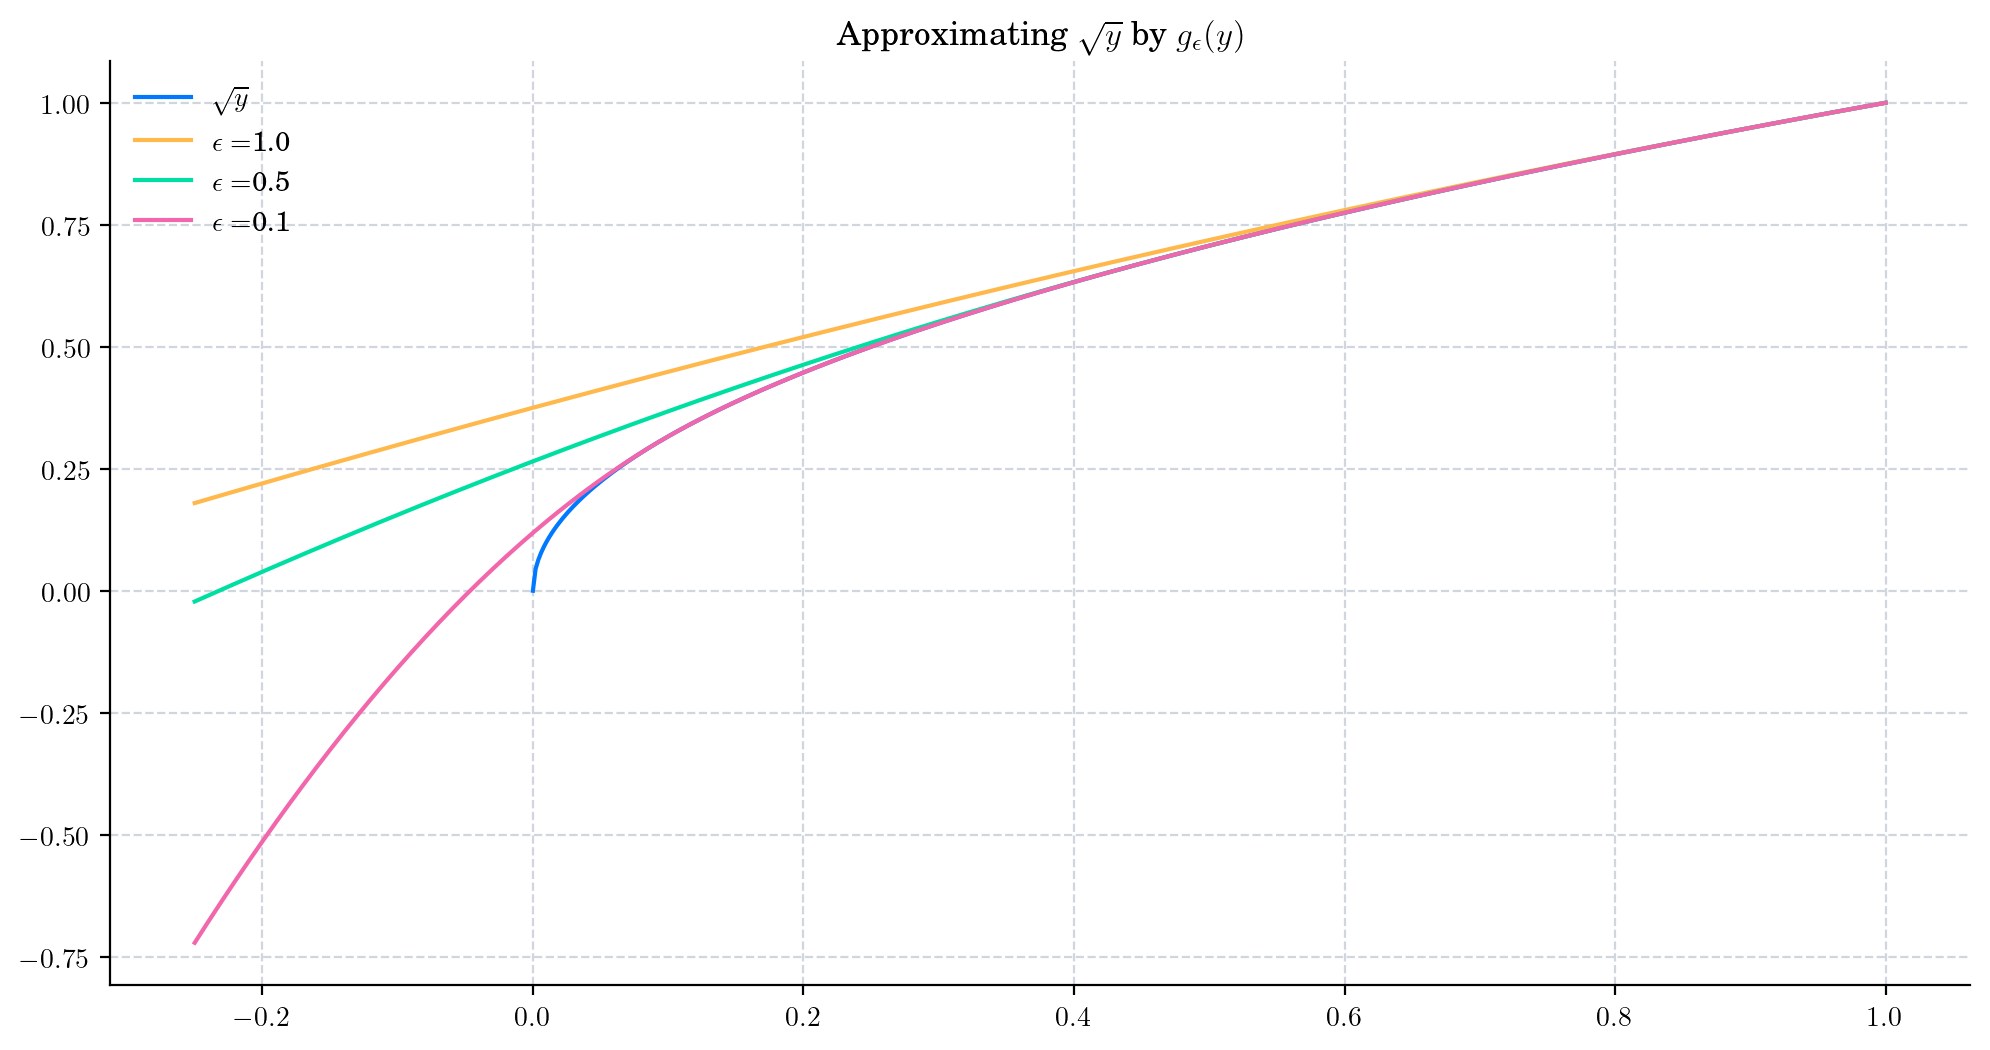

In [16]:
from math import sqrt
import numpy as np

def g_epsilon(y, epsilon):

    if y<= epsilon:
        sqrtep = sqrt(epsilon)
        result = (3/8)*sqrtep +(3/4)*(1/sqrtep)*y - (1/8)*(1.0/(epsilon*sqrtep))*y**2
        return result
    else:
        return sqrt(y)

ys0 = np.linspace(0.,1.0,500)
gs = [sqrt(y) for y in ys0]
plt.plot(ys0, gs, label='$\sqrt{y}$')
ys = np.linspace(-0.25,1.0,500)
for epsilon in [1.0, 0.5, 0.10]:
    ges = [g_epsilon(y, epsilon) for y in ys]
    diffs = [a-b for (a, b) in zip(ges, gs)]
    plt.plot(ys, ges, label = f'$\epsilon = ${epsilon}')
plt.title('Approximating $\sqrt{y}$ by $g_{\epsilon}(y)$')
plt.legend()
plt.show()

So, for $\epsilon>0$ Ito's formula implies that

\begin{equation}
g_{\epsilon} (Y_t) = \sum_{i=1}^d I_{t}^i(\epsilon) + J_t(\epsilon) + K_t(\epsilon),
\end{equation}

where

\begin{align*}
I_{t}^i(\epsilon) &= \int_0^t \left[  1_{\{Y_s\geq \epsilon\}} \frac{1}{X_s} +  1_{\{Y_s < \epsilon\}} \frac{1}{2\sqrt{\epsilon}} \left( 3 - \frac{Y_s}{\epsilon} \right)  \right] W_s^i dW_s^i  \\
J_t(\epsilon)     &= \int_0^t 1_{\{Y_s\geq \epsilon\}} \frac{d - 1}{2X_s} ds  \\
 K_t(\epsilon)    &= \int_0^t 1_{\{Y_s < \epsilon\}} \frac{1}{4 \sqrt{\epsilon}}  \left[ 3d - (d+2)\frac{Y_s}{\epsilon} \right]  ds.
\end{align*}

Next we show that, as $\epsilon\downarrow 0$ equation (7.5) yields (7.1). 



First, observe that  

\begin{align*}
\nonumber \mathbb{E}[ (B_t^i - I_t^i(\epsilon))^2 ] &= \mathbb{E} \int_0^t   1_{\{Y_s < \epsilon\}} \left[\frac{1}{X_s} - \frac{1}{2\sqrt{\epsilon}} \left( 3 - \frac{Y_s}{\epsilon} \right)  \right]^2 (W_s^i)^2ds \\
\nonumber & = \mathbb{E} \int_0^t   1_{Y_s < \epsilon} \left[1 - \frac{1}{2}\sqrt{\frac{Y_s}{\epsilon}} \left( 3 - \frac{Y_s}{\epsilon}  \right)  \right]^2 \left( \frac{W_s^i}{X_s} \right)^2ds.
\end{align*}

Then
\begin{align}
\nonumber \mathbb{E}[ (B_t^i - I_t^i(\epsilon))^2 ] & \leq \int_0^t \mathbb{P}(Y_s < \epsilon) ds = o(\sqrt{ \epsilon }) \qquad \text{as} \ \ \epsilon\downarrow 0.
\end{align}

Second,  the  monotone convergence theorem implies that

\begin{equation}

\lim_{\epsilon\downarrow 0} J_t(\epsilon)  =  \int_0^t 1_{\{Y_s\geq 0\}} \frac{d - 1}{2X_s} ds  =  \int_0^t\frac{d - 1}{2X_s} ds, \quad \text{a.s.}

\end{equation}

Finally, for the third term we have 

\begin{equation*}
0\leq \mathbb{E}[K_t(\epsilon)] \leq \frac{3d}{4\sqrt{\epsilon}} \int_0^t \mathbb{P}( Y_s < \epsilon) ds.
\end{equation*}

The probability in the term inside the last integral is bounded above by 

\begin{equation*}
 \mathbb{P}( (W_s^1)^2 +(W_s^2)^2 < \epsilon ) =  \int_0^{2\pi}\int_0^{\sqrt{\epsilon}}  \frac{1}{2\pi s} e^{-\frac{\rho^2}{2s}} \rho d\rho d\theta,
\end{equation*}

and so

\begin{align*}
\int_0^t \mathbb{P}(Y_t < \epsilon ) ds   &\leq \int_0^{\sqrt{\epsilon}}  \rho \left( \int_0^t \frac{1}{s} e^{-\frac{\rho^2}{2s}} ds \right ) d\rho \\ 
&= 2  \int_0^{\sqrt{\epsilon}}  \rho  \left( \int_{\frac{\rho}{\sqrt{t}} }^{\infty} \frac{1}{\xi} e^{-\frac{\xi^2}{2}} d\xi \right ) d\rho.
\end{align*}

upon Fubini's theorem and the change of variable $\xi =\frac{\rho}{\sqrt{s}}$. Now it is not difficult to see that this expression is $o(\sqrt{\epsilon})$ as $\epsilon\downarrow 0$, using the rule of l'Hopital. Therefore

\begin{equation}
\lim_{\epsilon\downarrow 0} \mathbb{E}[ K_t(\epsilon) ] = 0. 
\end{equation}


Replacing equations (7.4)-(7.6) in (7.3), we obtain the desired result. $\blacksquare$



So, we have shown that the Bessel process with integer dimension $BES_0^d$ satisfies the following SDE:

\begin{equation*}
X_t = B_t +  \int_0^t\frac{(d - 1)}{2X_s} ds, \quad  t\geq 0.
\end{equation*}

where $B$ is a standard Brownian motion.

Note: In the case $d=1$, an integral equation similar to (6.4) can be derived from Tanaka's formula.

Moreover,  Ito's formula implies that the Squared Bessel process $BESQ_0^d$ satisfies the following SDE:

\begin{equation*}
Y_t = 2 \int_0^t \sqrt{Y_t} dB_s +   t d, \quad t\geq 0.
\end{equation*}

## General SDEs

Now, we can generalise the SDEs obtained in the previous section by 

- replacing the integer $d\geq 2$, by a $\delta \geq 0$; 
- and consider an initial point $x\geq 0$.

So, for every $\delta\geq 0$ and $x\geq 0$, consider the SDE given by 

\begin{align}
X_t &= x +  B_t + \int_0^t\frac{(\delta - 1)}{2X_s} ds, \qquad t\geq 0.
\end{align}

Similarly, for every $\delta\geq 0$ and $y\geq 0$, consider the SDE given by

\begin{align}
Y_t &=  y  + 2 \int_0^t \sqrt{ Y_t } dB_s +  t\delta,  \qquad t\geq 0.\\
\end{align}

### Existence and Uniqueness

#### Squared Bessel Processes

In order to demonstrate that equation (7.8) has a solution we require the following two results whose proofs can be found in [Jeanblanc, Yor, Chesney, 2009].


**Theorem 1.** Consider the SDE
\begin{equation*}
X_t =X_0 + \int_0^t b(s,X_s) ds + \int_0^t\sigma(s,X_s)dW_s.
\end{equation*}
Suppose $\varphi : (0,\infty) \rightarrow (0,\infty)$ is a Borel function such that 

$$ \int_0^{\infty} \dfrac{da}{\varphi(a)}  = \infty.$$

If any of the following conditions holds, then the equation admits a unique solution which is is strong. Moreover the solution $X$ is a Markov process.

1. the function $b$ is bounded, the function $\sigma$ does not depend on the time variable and satisfies

$$ |\sigma(x) - \sigma(y)|^2 \leq \varphi(|x-y|), $$

and $|\sigma|\geq \epsilon >0$.

2. $b$ is Lipschitz continuous, and 

$$ |\sigma(s,x) - \sigma(s, y)|^2 \leq \varphi(|x-y|). $$


3. $b$ is bounded, and $\sigma$ does not depend on the time variable and satisfies

$$ |\sigma(x) - \sigma(y)|^2 \leq |f(x) - f(y)|, $$

where $f$ is a bounded increasing function, $|\sigma|\geq \epsilon >0$.


**Theorem 2. (Comparison Theorem)** Consider the two SDEs

\begin{equation*}
dX^i_t = b_i(t, X^i_t) dt + \sigma(t,X^i_t) dW_t, \qquad i =1,2;
\end{equation*}
where the functions $b_i$ are both bounded and at least one of them is Lipschitz; and $\sigma$ satisfies condition (2) or (3) in Theorem 1.  Suppose also that $X^1_0 \geq X^2_0,$ and $b_1(x) \geq b_2(x)$. Then $X^1_t \geq X^2_t$ for all $t$, almost surely.



Next we will show that (7.8) has a unique strong solution. To do this we first introduce the SDE

\begin{align}
Y_t &=  y + \delta t + 2 \int_0^t \sqrt{ |Y_s| } dB_s,  \qquad Y_s\geq 0,\\
\end{align}

which is almost identical to (7.8) but with an absolute value inside the square root term. Then, using the elementary inequality 

$$|\sqrt{x} - \sqrt{y}| \leq \sqrt{|x-y|},  \qquad x, y \geq 0,$$

Theorem 1 implies that the equation () has a unique strong solution. Such solution is called the Squared Bessel process of dimension $\delta$ starting from $y$, and is denoted by $BESQ_y^{\delta}$.

The final thing to do is explaining why we can drop the absolute value inside the square root term. First, we should note that if the process starts at zero, i.e. when $y=0$, and $\delta=0$, then the $Y=0$ is the unique solution.

Moreover, consider $0\leq \delta \leq \delta'$ and let $Y$ and $Y'$ the squared Besses processes with such dimensions, both starting at the same initial condition. Then, the Comparison Theorem imples that 

$$ 0\leq Y_t \leq Y_t', \qquad \hbox{almost surely.}$$

Thus, $Y$ satistifies $Y_t\geq 0$ for all $t\geq 0$, and the absolute value inside the square root term is not needed. So, hereafter we will ommit it.

#### Bessel Processes

The following result on the behaviour of the trajectories of Squared Bessel processes can be found in [Revuz & Yor 1999]

- For $\delta=0$, the point $y=0$ is absorbing 
- For $0<\delta <2$, the point $y=0$ is reflecting 
- For $\delta \leq 1$, the point $y=0$ is reached almost surely
- For $\delta \geq 2$, the point $y=0$ is unattainable.

When $y>0$ and $\delta \geq 2$, the square root of $BESQ^{\delta}_{y}$ is called the Bessel process of dimension $\delta$ started at $x=\sqrt{y}$ and denoted by $BES^{\delta}_{x}$. Note that in this case the origin is unattainable, and we can apply Ito's formula to find that $BES^{\delta}_{x}$ indeed satisfies SDE (7.7).

Let's finish this notebook by showing some colorful simulations!

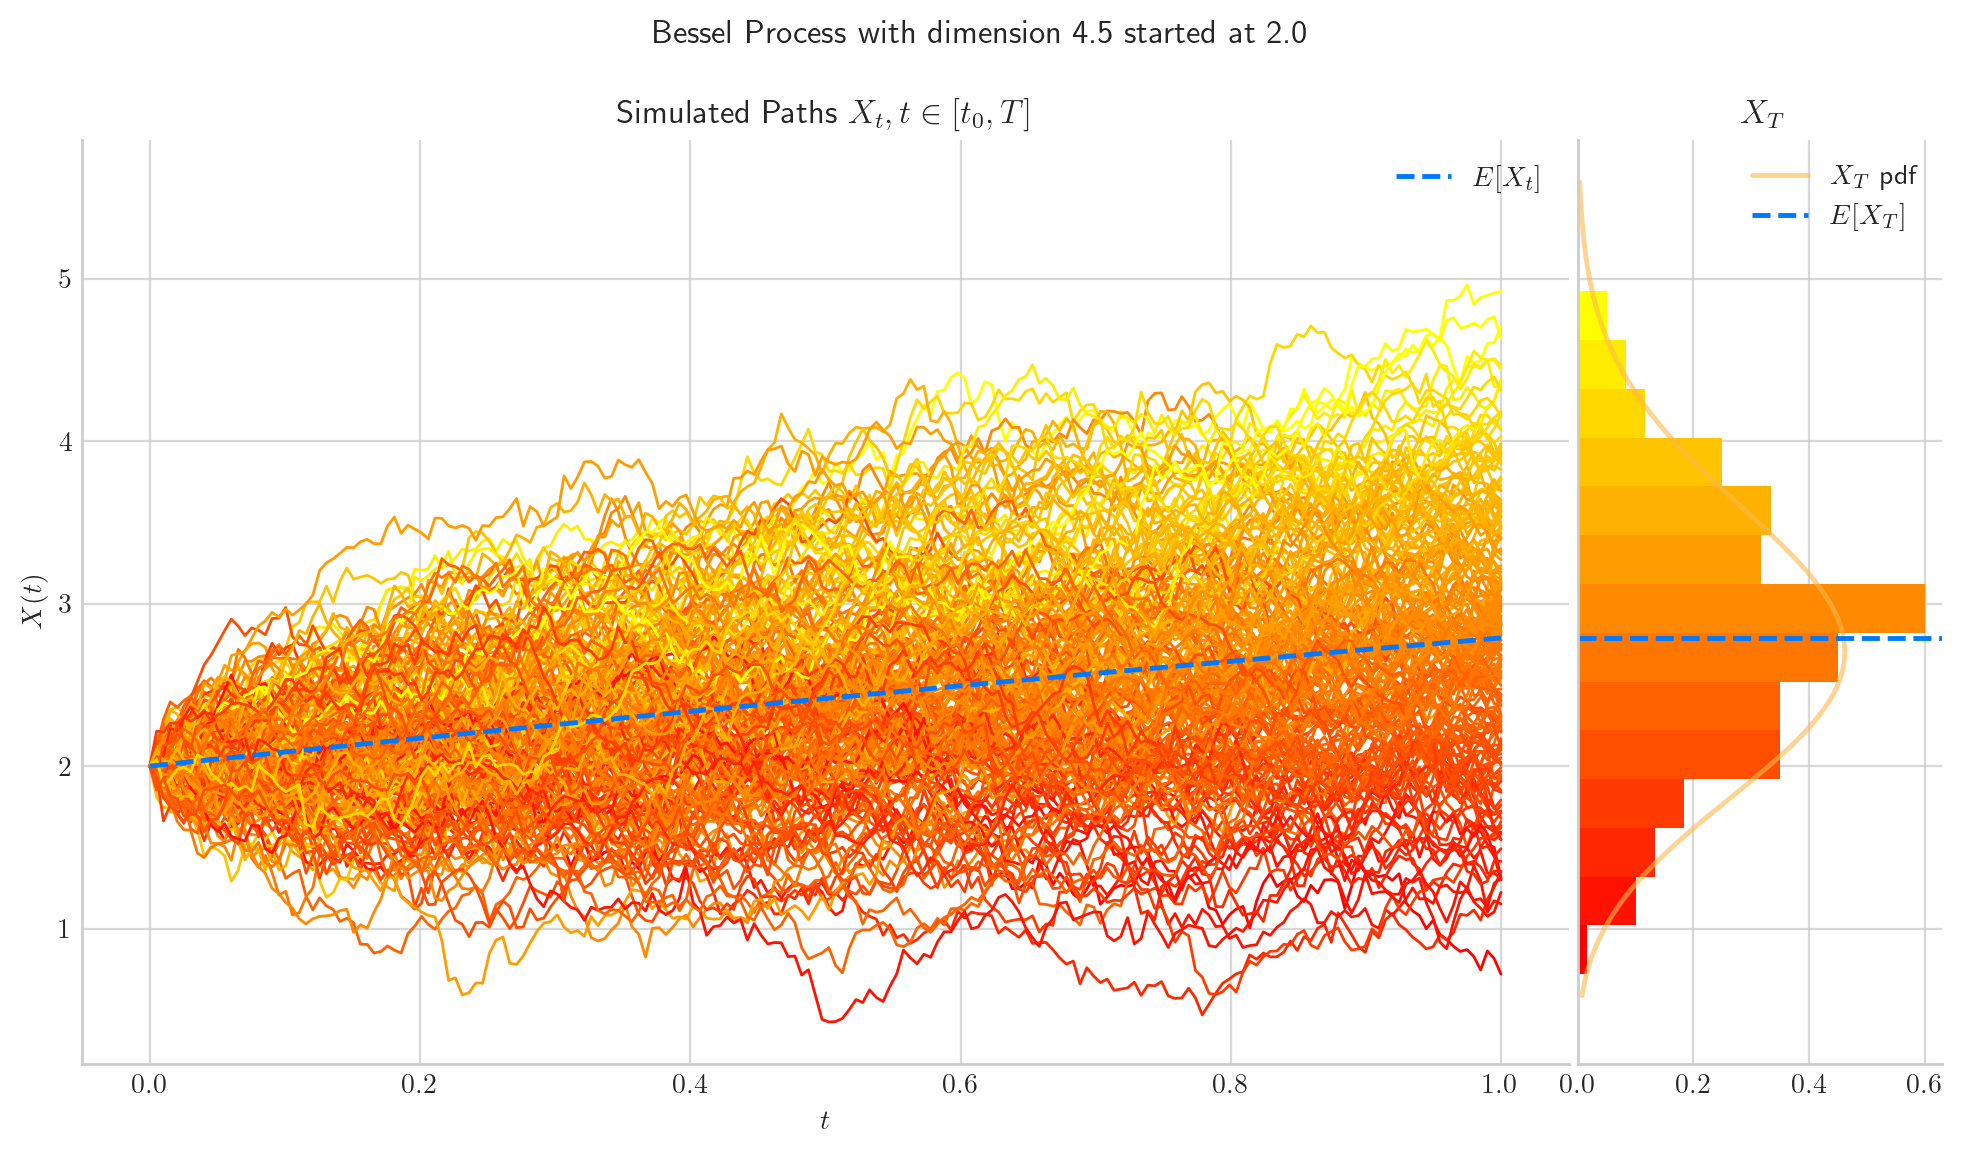

In [22]:
from aleatory.processes import BESProcess
process = BESProcess(initial=2.0, dim=4.5)
fig = process.draw(n=200, N=200, envelope=False, colormap="autumn", title="Bessel Process with dimension 4.5 started at 2.0")

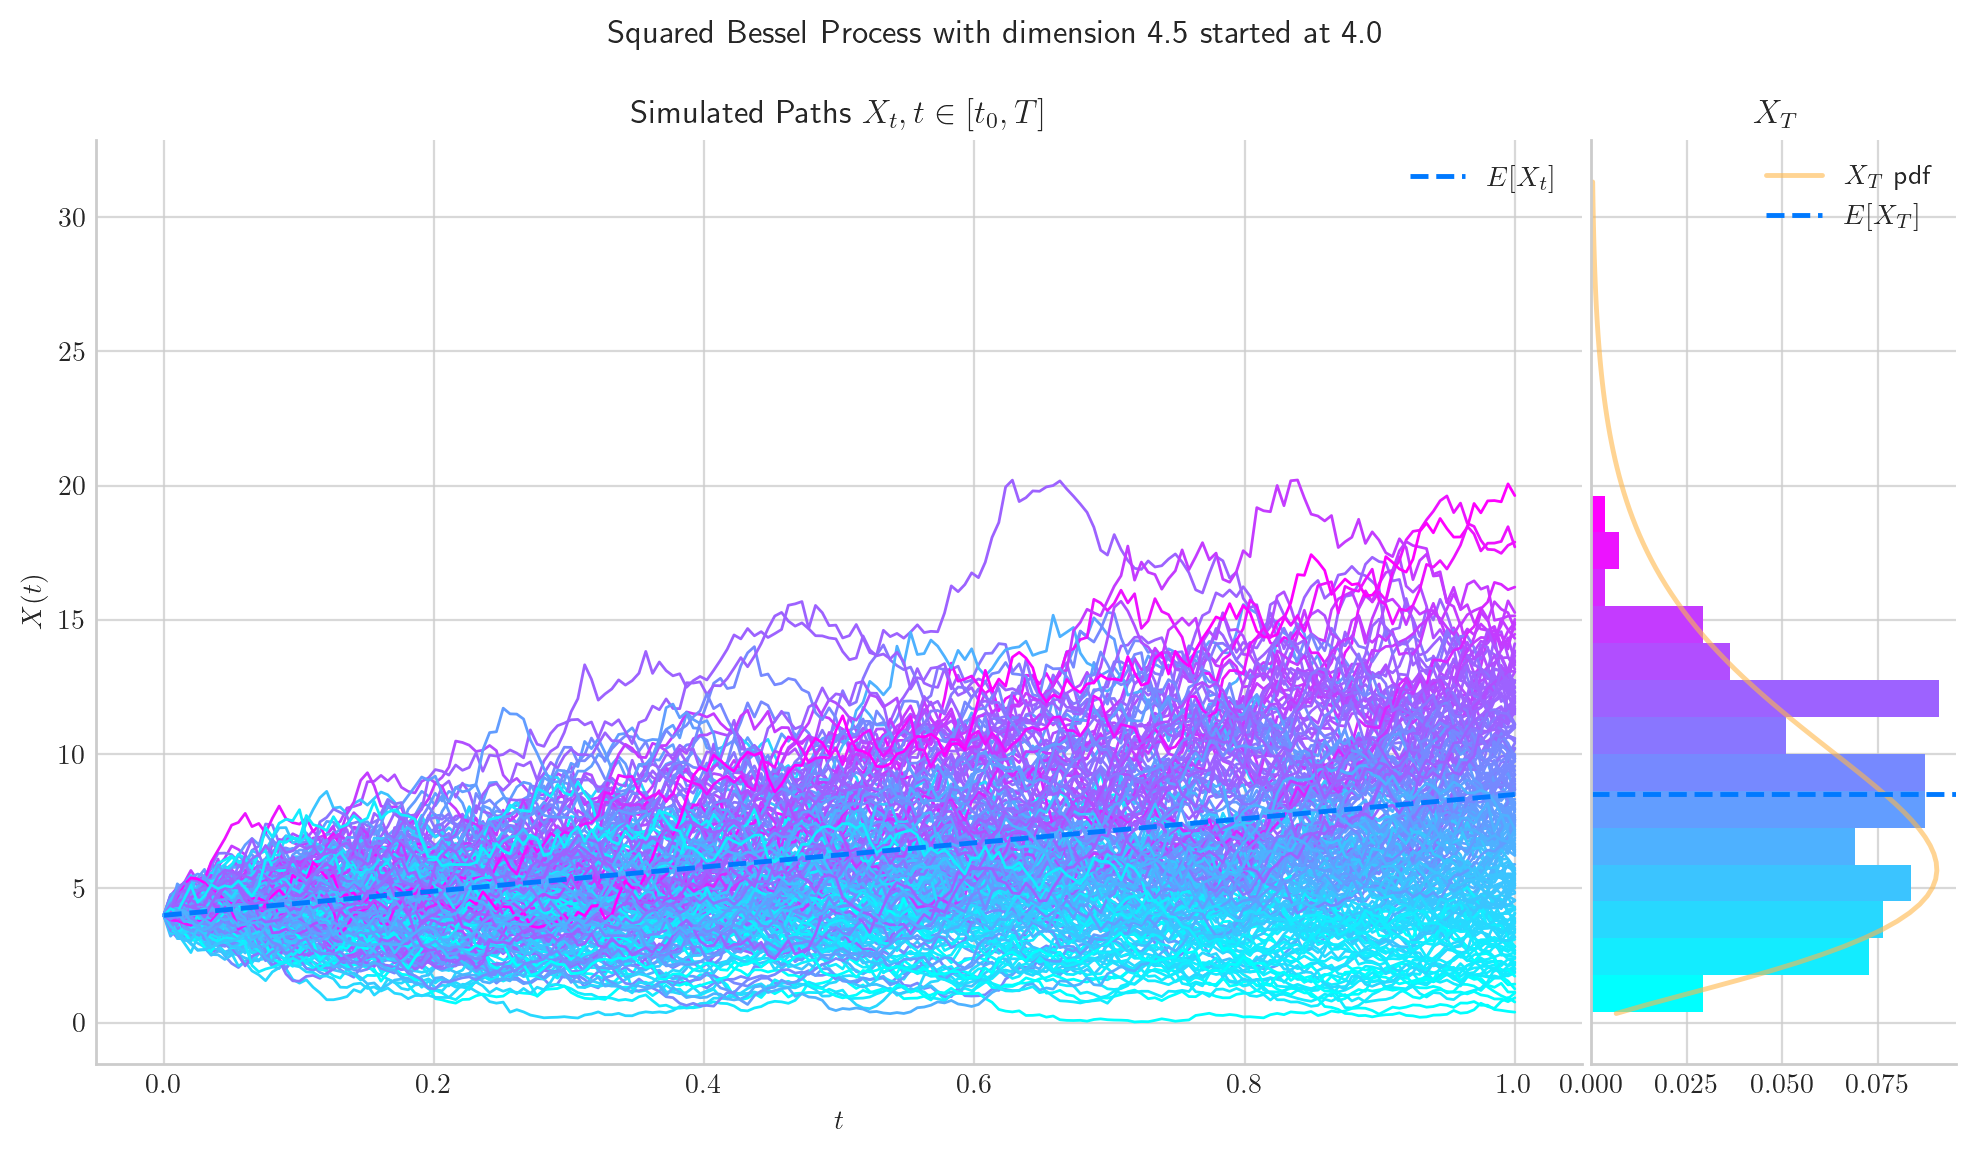

In [23]:
from aleatory.processes import BESQProcess
process = BESQProcess(initial=4.0, dim=4.5)
fig = process.draw(n=200, N=200, envelope=False, colormap="cool", title="Squared Bessel Process with dimension 4.5 started at 4.0")

In the next notebook we will explore these processes further!